# Lab Assignment: Logistic Regression vs Perceptron
## Objective:
This lab will help you understand and compare Logistic Regression and Perceptron algorithms using the Diabetes dataset. You will explore the dataset, implement both models, evaluate their performance, and analyze their results.

#### First: let's import necessary libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Dataset Characteristics:

- Source: Scikit-learn (sklearn.datasets.load_diabetes)

- Features: 10 numerical features representing diagnostic measurements:
    - Age
    - Sex
    - Body mass index
    - Average blood pressure
    - Serum measurements (e.g., cholesterol levels)

- Target Variable:

    - 0 for no diabetes
    - 1 for diabetes

- Data Structure:

    - Number of Samples: 442
    - Number of Features: 10
    - Feature Names: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
    - Target Names: no diabetes, diabetes

In [83]:
# Load the dataset
data = load_diabetes()


# Separate the data into feature data and target data
# TODO: Set X to the feature data
# TODO: Set y to the target data
# HINT: The feature and target data are class members of the data object (data.?)
x = data.data 
y = data.target


# TODO: Display feature names
# HINT: The feature names is also a class member of the data object (data.?)
print(data.feature_names)

# TODO: Display the first 5 rows of the feature data
print(x[:5])

# TODO: Display the first 5 elements of the target data
print(y[:5])


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


### You should find a problem after printing the target
- ***See in the target values!***
- ***What is wrong about it?***
- ***Can We Use the Target Variable as It Is?***

**Answer:** **The target data is continuous, so we need to convert it to discrete values (here binary - having diabetes or not) to be able to use it in logistic regression and perceptron models.**

Don't look in the next cell 3ashan fiha el egaba🤓

In [84]:
# TODO: Convert the target data to binary
# TODO: Think about the best way to convert the target data to binary?
# TODO: What is the best way to choose the threshold?
# NOTE: There might be a lot ways to choose threshold, 
# there might be a medical threshold that evaluates the disease progress to identify when it considered diabetes or not.
# We may also choose the median or mean or even a percentile to identify a center threshold for convenience and that's what I did.
print(np.median(y))
print(np.mean(y))
print(np.percentile(y, 75))

threshold = np.percentile(y, 50)
y_binary = [1 if i > threshold else 0 for i in y]
# TODO: Display the first 5 elements of the new target data
print(y_binary[:5])

140.5
152.13348416289594
211.5
[1, 0, 1, 1, 0]


In [85]:
# TODO: Create DataFrame from feature data
# HINT: Use the feature names as column names and the X data as the data
df = pd.DataFrame(x, columns=data.feature_names)
# TODO: Add target data to DataFrame
df['target'] = y_binary

In [86]:
# Show class distribution
class_distribution = df['target'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
target
1    221
0    221
Name: count, dtype: int64


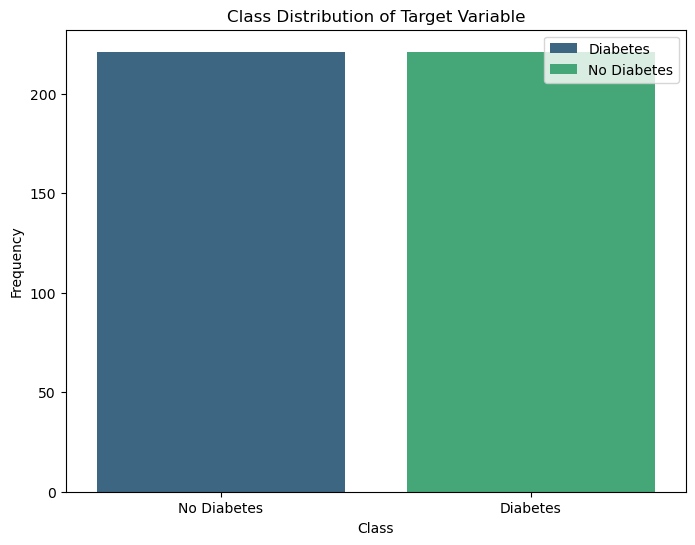

In [87]:
# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', hue=['No Diabetes', 'Diabetes'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

**Think about:** Why do we need to observe the class distribution?


Not Explained yet but I want to hear your guesses 😁 <br>
Answer: .........

- to check if the data set is imbalanced or not, (maybe the data doesn't have people who have diabetes at all)

Logistic Regression - Accuracy: 0.83, Precision: 0.86, Recall: 0.80, F1 Score: 0.83
Perceptron - Accuracy: 0.78, Precision: 0.80, Recall: 0.77, F1 Score: 0.79


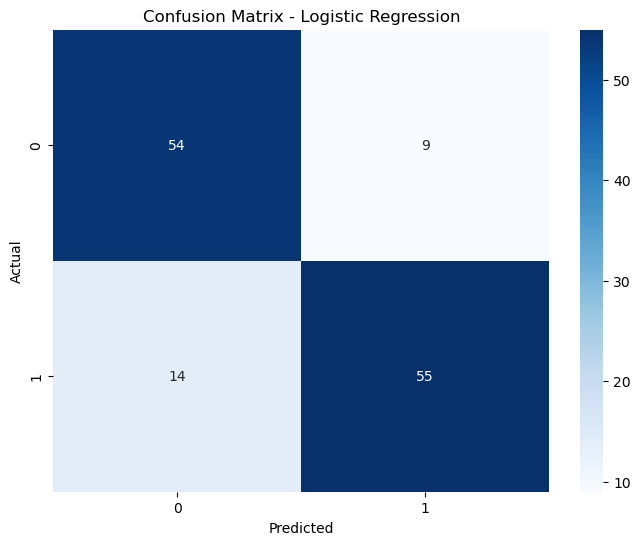

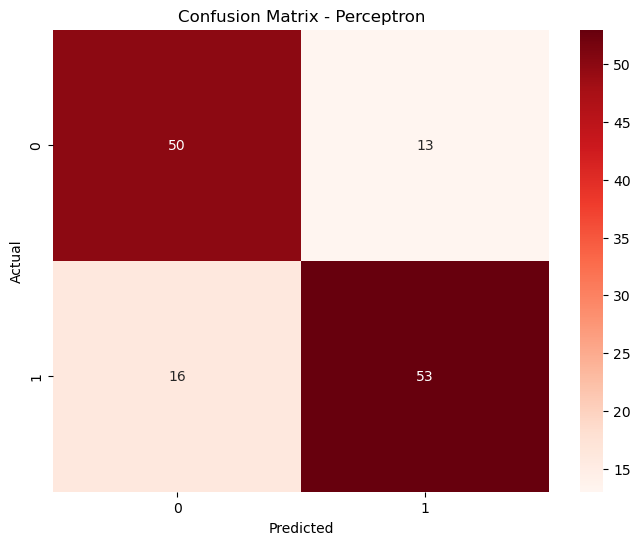

In [88]:
def custom_train_test_split(X, y, test_size=0.3):
    """
    Split the data into training and testing sets.

    Parameters:
    - X: Features data
    - y: Target data
    - test_size: Proportion of the dataset to include in the test split (default is 0.3)

    Returns:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training target
    - y_test: Testing target
    """
    
    # Calculate the number of samples
    num_samples = X.shape[0]
    # Calculate the number of test samples
    num_test_samples = int(num_samples * test_size)
    
    # TODO: Create indices then shuffle them
    # Hint: Shuffle the indices to ensure that the data is randomly split. Use np.arange(num_samples) to create the indices and np.random.shuffle to shuffle them.
    # we use np.arange(num_samples) to create an array of indices from 0 to num_samples - 1
    # We want then to shuffle it, if the original indices array was [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], after shuffling it might become [3, 0, 8, 6, 2, 5, 9, 4, 7, 1].
    # Why shuffling?
    # Why Shuffle?
    # Shuffling is important to ensure that your training and test sets are representative of the entire dataset and not affected by the order of the samples. 
    # Without shuffling, if the data is sorted or ordered in a certain way (e.g., all samples of one class appearing before another), 
    # the training and testing splits might not be representative of the overall dataset distribution.
    # 1.
    indices = np.arange(num_samples)
    # 2.
    np.random.shuffle(indices)

    
    # TODO: Split the indices into training and testing
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]
    
    # Create the training and testing sets
    X_train, X_test = [X[i] for i in train_indices], [X[i] for i in test_indices]
    y_train, y_test = [y[i] for i in train_indices], [y[i] for i in test_indices]
    
    return X_train, X_test, y_train, y_test

# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = custom_train_test_split(X, y_binary, test_size=0.3)


# TODO: Initialize and train Logistic Regression model with a high number of iterations (max_iter=10000)
log_reg = LogisticRegression(max_iter=10000)

# TODO: Fit the model
log_reg.fit(X_train, y_train)

# TODO: Predict the target values
y_pred_log_reg = log_reg.predict(X_test)

# TODO Initialize and train Perceptron model with a high number of iterations (max_iter=10000)
perceptron = Perceptron(max_iter=10000)

# TODO: Fit the model
perceptron.fit(X_train, y_train)

# TODO: Predict the target values
y_pred_perceptron = perceptron.predict(X_test)

# Function to evaluate and print model metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Evaluate Logistic Regression
# TODO: call the evaluate_model function to evaluate the Logistic Regression model
evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression')

# Evaluate Perceptron
# TODO: call the evaluate_model function to evaluate the Perceptron model
evaluate_model(y_test, y_pred_perceptron, 'Perceptron')

# Plot Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Perceptron
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Perceptron')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- The evaluation metrics have not been explained yet, but I want you to try to understand what these numbers and graphs represent!

- Also, try running the train_test_split function multiple times and observe how it affects the evaluation metrics.

- Additionally, search for another built-in function that can handle the data split.